HPSS - High Produce Supply Stores
LPSS - Low Produce Supply Stores

## Give us your purchases for the week and we will forecast how much inventory you need to buy

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# phillyfoodretail = pd.read_csv('/content/NeighborhoodFoodRetail.csv')
# phillyfoodretail.head()

,OBJECTID,GEOID10,NON_RESIDENTIAL,TOTAL_LPSS,LPSS_PER1000,TOTAL_HPSS,HPSS_PER1000,PCT_HPSS,HPSS_ACCESS,SUPERMARKET_ACCESS,PCT_VEHICLE_AVAILABILITY,TOTAL_RESTAURANTS,PCT_POVERTY,HIGH_POVERTY,Shape__Area,Shape__Length
0,1,421010108001,No,25.0,30.674847,2.50,3.067485,9.090909,Moderate or High Access,Yes,44.268775,0,54.969325,Yes,275942.097656,3260.316044
1,2,421010108002,No,21.0,28.806584,1.75,2.400549,7.692308,Moderate or High Access,Yes,67.611336,2,37.860082,Yes,176880.882812,1736.152373
2,3,421010109002,No,7.0,17.114914,0.50,1.222494,6.666667,Low Access,No,37.356322,1,57.212714,Yes,74520.027344,1211.853466
3,4,421010110002,No,15.0,19.480519,2.75,3.571429,15.492958,Moderate or High Access,Yes,52.824859,0,19.480519,No,185771.992188,2057.362419
4,5,421010110001,No,17.0,25.914634,2.50,3.810976,12.820513,Moderate or High Access,Yes,70.408163,1,52.134146,Yes,242486.906250,4166.159591


In [2]:
#example orders for 2015 for a pizza place (Savas Brick Oven Pizza) with 48.6k orders for the year
purchases = pd.read_csv('Data Model - Pizza Sales.csv')
purchases

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,12/31/2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,12/31/2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,12/31/2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,12/31/2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Text(0, 0.5, 'Purchases')

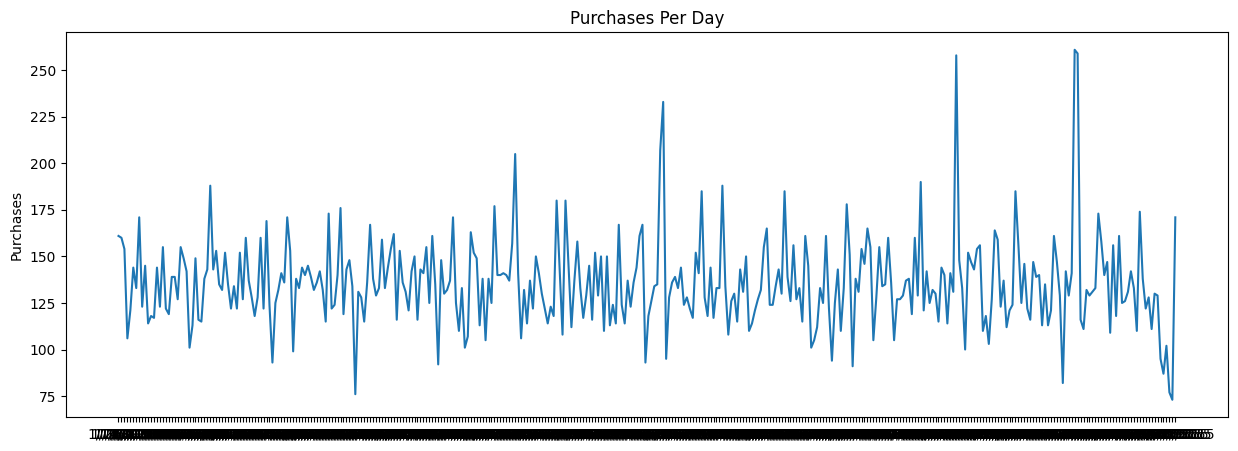

In [3]:
purchasesperday = purchases.order_date.value_counts()[purchases.order_date.unique()]
plt.figure(figsize=(15,5))
plt.plot(purchasesperday)
plt.title("Purchases Per Day")
plt.ylabel("Purchases")
#July and December/Christmas has the most sales

Text(0.5, 1.0, 'Top 5 most popular pizza categories of 2015')

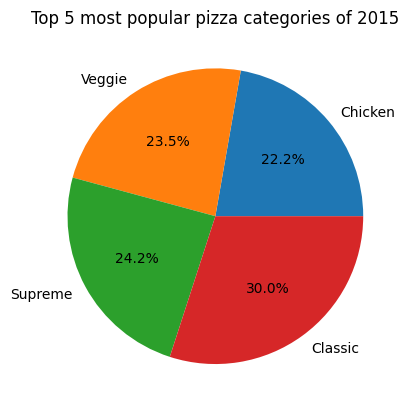

In [9]:
pizzatypes = purchases["pizza_category"].value_counts().to_dict()
pizzassorted = dict(sorted(pizzatypes.items(), key=lambda item: item[1]))

plt.pie(list(pizzassorted.values())[-5:], labels=list(pizzassorted.keys())[-5:], autopct='%1.1f%%')
plt.title("Top 5 most popular pizza categories of 2015")

Text(0.5, 1.0, 'Most Popular Pizza Sizes')

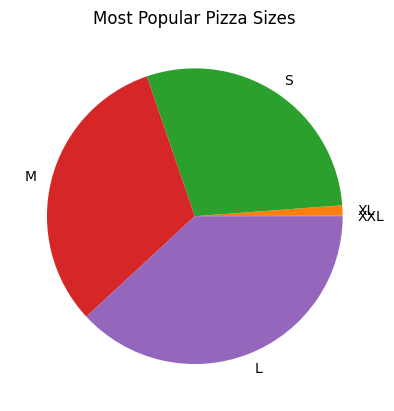

In [10]:
pizzatypes = purchases["pizza_size"].value_counts().to_dict()
pizzassorted = dict(sorted(pizzatypes.items(), key=lambda item: item[1]))

plt.pie(list(pizzassorted.values()), labels=list(pizzassorted.keys()))
plt.title("Most Popular Pizza Sizes")

Text(0.5, 1.0, 'Top 5 most popular pizzas of 2015')

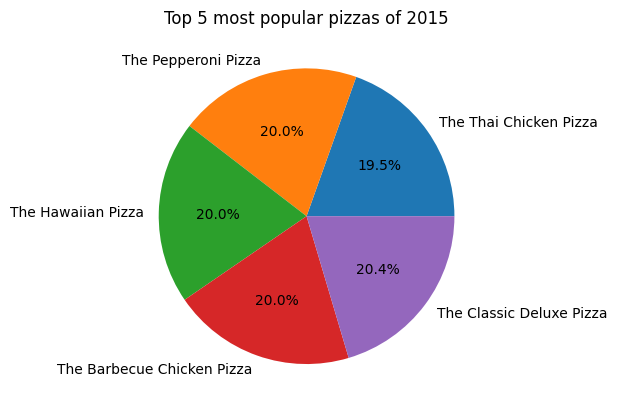

In [11]:
pizzatypes = purchases["pizza_name"].value_counts().to_dict()
pizzassorted = dict(sorted(pizzatypes.items(), key=lambda item: item[1]))

plt.pie(list(pizzassorted.values())[-5:], labels=list(pizzassorted.keys())[-5:], autopct='%1.1f%%')
plt.title("Top 5 most popular pizzas of 2015")

In [ ]:
pd.DataFrame([round(p/sum(purchases["quantity"].value_counts().to_list())*100, 2) for p in purchases["quantity"].value_counts().to_list()],
             columns =["Percent Quantity Pizzas Bought out of total"], index=list(range(1,5)))

,Percent Quantity Pizzas Bought out of total
1,98.09
2,1.86
3,0.04
4,0.01


In [12]:
ordertimes=purchases["order_time"].value_counts().to_list()[:5]
pd.DataFrame([purchases["order_time"].value_counts().index.to_list()[:5], ordertimes], columns=list(range(1,6)), index=["Top 5 most popular times to buy pizza", "Orders bought"])
#lunch time is most popular time to buy pizza

,1,2,3,4,5
Top 5 most popular times to buy pizza,12:32:00,11:59:10,12:53:29,12:52:36,12:26:04
Orders bought,26,24,23,23,23


Text(0, 0.5, 'Frequency')

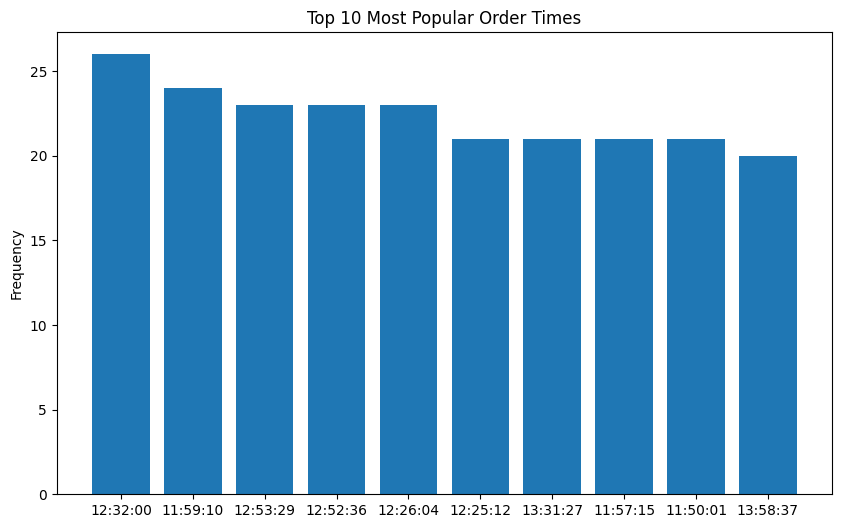

In [ ]:
n=10
plt.figure(figsize=(10,6))
plt.bar(range(n), purchases["order_time"].value_counts().to_list()[:n])
plt.xticks(range(n),
purchases["order_time"].value_counts().index.to_list()[:n])
plt.title("Top 10 Most Popular Order Times")
plt.ylabel("Frequency")

In [ ]:
pd.DataFrame([purchases["total_price"].value_counts().index.to_list()[:5], purchases["total_price"].value_counts().to_list()[:5]], index=["Top total order costs", "Number of Orders"], columns=list(range(1,6)))

,1,2,3,4,5
Top total order costs,20.75,12.0,16.0,16.75,16.5
Number of Orders,8485.00,5465.0,4428.0,4211.00,3970.0


In [ ]:
#BOOM BOOM PIZZA SUPREME
data=[
              purchases["pizza_name"].value_counts().index.to_list()[:5],
              purchases["pizza_name"].value_counts().to_list()[:5],
              purchases["pizza_ingredients"].value_counts().index.to_list()[:5],
              purchases["pizza_category"].value_counts().index.to_list()[:5],
              purchases["pizza_size"].value_counts().index.to_list()[:5],
      ]
pd.DataFrame(data, columns=list(range(1,6)),
             index=["Top 5 Pizzas",
                    "Orders",
                    "Ingredients",
                    "Pizza Category",
                    "Pizza Size"
                    ])

,1,2,3,4,5
Top 5 Pizzas,The Classic Deluxe Pizza,The Barbecue Chicken Pizza,The Hawaiian Pizza,The Pepperoni Pizza,The Thai Chicken Pizza
Orders,2416,2372,2370,2369,2315
Ingredients,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...","Barbecued Chicken, Red Peppers, Green Peppers,...","Sliced Ham, Pineapple, Mozzarella Cheese","Mozzarella Cheese, Pepperoni","Chicken, Pineapple, Tomatoes, Red Peppers, Tha..."
Pizza Category,Classic,Supreme,Veggie,Chicken,None
Pizza Size,L,M,S,XL,XXL


In [13]:
purchasesperday.tail(-1), purchasesperday.shift(1).fillna(0).tail(-1)

(1/2/2015      160
 1/3/2015      154
 1/4/2015      106
 1/5/2015      121
 1/6/2015      144
              ... 
 12/27/2015     87
 12/28/2015    102
 12/29/2015     77
 12/30/2015     73
 12/31/2015    171
 Name: order_date, Length: 357, dtype: int64,
 1/2/2015      161.0
 1/3/2015      160.0
 1/4/2015      154.0
 1/5/2015      106.0
 1/6/2015      121.0
               ...  
 12/27/2015     95.0
 12/28/2015     87.0
 12/29/2015    102.0
 12/30/2015     77.0
 12/31/2015     73.0
 Name: order_date, Length: 357, dtype: float64)

In [4]:
X=purchasesperday.tail(-1).to_numpy()
y=purchasesperday.shift(1).fillna(0).tail(-1).to_numpy()
#for now just total orders, we can do orders of each pizza later

X_train = X.reshape(-1,1)[:300]
y_train = y[:300]
X_test = X.reshape(-1,1)[300:]
y_test = y[300:]

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import absolute

reg = RandomForestRegressor()
reg.fit(X_train,y_train)

mean_absolute_error(y_test, reg.predict(X_test))
#average error is +/- 24 orders for baseline model

24.066460677537695

In [16]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(reg, X.reshape(-1,1), y.reshape(-1,1), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean Order MAE: %.3f (σ = %.3f)' % (scores.mean(), scores.std()) )
#with cross validation

Mean Order MAE: 19.436 (σ = 3.050)


In [6]:
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
mean_absolute_error(y_test, model.predict(X_test))

24.65848434180544

In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X.reshape(-1,1), y.reshape(-1,1), scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean Order MAE: %.3f (σ = %.3f)' % (scores.mean(), scores.std()) )
#average error is +/- 19 orders for improved XGBoost

Mean Order MAE: 20.383 (σ = 3.046)


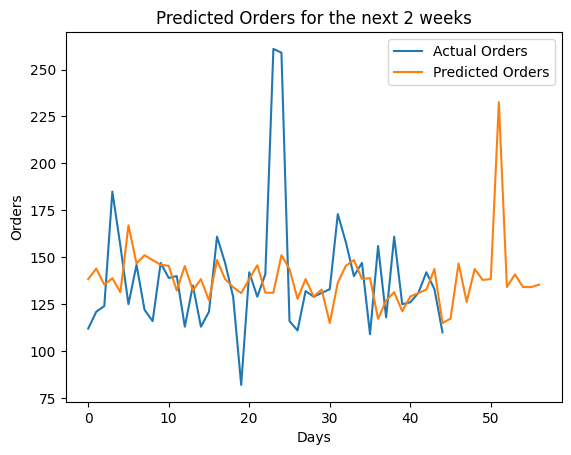

In [11]:
predictions = model.predict(X_test)
plt.plot(range(len(y_test[:45])), y_test[:45], label="Actual Orders")
predictions = model.predict(X_test)
plt.plot(range(len(predictions)), predictions, label="Predicted Orders")
plt.legend()
plt.title("Predicted Orders for the next 2 weeks") #Actual vs Predicted Orders for last 2 months of the year
plt.ylabel("Orders")
plt.xlabel("Days")
plt.savefig("ml_ouput.png")

In [9]:
X_test

array([[121],
       [124],
       [185],
       [156],
       [125],
       [146],
       [122],
       [116],
       [147],
       [139],
       [140],
       [113],
       [135],
       [113],
       [121],
       [161],
       [147],
       [129],
       [ 82],
       [142],
       [129],
       [141],
       [261],
       [259],
       [116],
       [111],
       [132],
       [129],
       [131],
       [133],
       [173],
       [158],
       [140],
       [147],
       [109],
       [156],
       [118],
       [161],
       [125],
       [126],
       [131],
       [142],
       [133],
       [110],
       [174],
       [138],
       [122],
       [128],
       [111],
       [130],
       [129],
       [ 95],
       [ 87],
       [102],
       [ 77],
       [ 73],
       [171]], dtype=int64)

In [ ]:
predictions = model.predict(X_test)
plt.plot(range(len(y_test)), y_test, label="Actual Orders")
predictions = model.predict(X_test)
plt.plot(range(len(predictions)), predictions, label="Predicted Orders")
plt.legend()
plt.title("Actual vs Predicted Orders for last 2 months of the year")
plt.ylabel("Orders")
plt.xlabel("Days")
plt.savefig("ml_ouput.png")

In [ ]:
#save XGBoost Regressor since it performs slightly better
import pickle

with open('OrdersForecaster.pkl','wb') as f:
    pickle.dump(model,f)